In [1]:
import glacierml as gl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
pd.set_option('display.max_columns', None)

In [145]:
df = gl.load_notebook_data(    coregistration = 'df1'
)

In [146]:
glac = gl.load_training_data(RGI_input = 'y', 
                             alt_pth = '/data/fast1/glacierml/data/RGI/rgi60-attribs/')

In [147]:
glac = glac[['RGIId', 'Thickness']]
df = pd.merge(df, glac, on = 'RGIId', how = 'inner')
df

,RGIId,Edasi Mean Thickness,Edasi Median Thickness,Edasi Thickness Std Dev,Edasi Shapiro-Wilk statistic,Edasi Shapiro-Wilk p_value,Edasi IQR,Edasi Lower Bound,Edasi Upper Bound,Total estimates,region,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax,Edasi Volume (km3),Edasi Volume Std Dev (km3),Farinotti Mean Thickness,Farinotti Shapiro-Wilk statistic,Farinotti Shapiro-Wilk p_value,Farinotti Median Thickness,Farinotti Thickness STD,Farinotti Skew,Farinotti Volume (km3),Thickness
0,RGI60-01.00037,173.332396,171.549740,23.940391,0.984675,9.328488e-07,27.057150,21.547516,20.846480,707.0,01,63.469173,-146.528168,12.0,722,1841,3081,234.583,30,41911,40.660833,5.616009,221.368740,0.894585,0.000000e+00,174.291930,53.527866,0.780877,51.929343,235.0
1,RGI60-01.00570,60.057321,60.004017,8.322061,0.991365,3.797126e-04,10.690418,7.769222,8.167331,707.0,01,63.281000,-145.427000,14.0,1162,1858,2438,17.567,172,8639,1.055027,0.146194,75.656790,0.939484,0.000000e+00,67.445496,18.147484,0.752189,1.329063,147.0
2,RGI60-01.01104,73.385647,73.116710,7.819154,0.994282,9.111721e-03,10.932543,7.368136,8.000052,707.0,01,58.380000,-134.349000,10.0,676,1123,1494,9.528,327,6332,0.699218,0.074501,110.901680,0.944506,0.000000e+00,97.632590,29.573280,0.806189,1.056671,66.0
3,RGI60-01.02236,29.891749,29.610521,5.655508,0.992279,9.862094e-04,6.949670,5.333609,5.402480,707.0,01,69.276000,-143.819000,22.0,2360,2440,2554,0.153,219,680,0.004573,0.000865,22.385798,0.970167,4.969998e-05,24.184961,1.360460,-0.282476,0.003425,83.0
4,RGI60-01.02236,29.891749,29.610521,5.655508,0.992279,9.862094e-04,6.949670,5.333609,5.402480,707.0,01,69.276000,-143.819000,22.0,2360,2440,2554,0.153,219,680,0.004573,0.000865,22.385798,0.970167,4.969998e-05,24.184961,1.360460,-0.282476,0.003425,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,RGI60-19.01012,62.486285,61.937560,17.439620,0.995606,4.286455e-02,22.571971,16.552636,17.169582,707.0,19,-65.052700,-63.393600,0.0,10,-999,50,0.213,-9,318,0.013310,0.003715,15.617301,0.989473,1.451944e-02,15.721304,0.932892,0.161842,0.003326,312.0
496,RGI60-19.01950,55.084671,54.207070,14.118198,0.994361,9.978550e-03,18.816785,14.321474,13.678565,707.0,19,-62.047200,-58.376500,7.4,30,-999,630,7.240,150,5187,0.398813,0.102216,398.524960,0.950762,0.000000e+00,347.143980,49.511383,0.124630,2.885321,238.0
497,RGI60-19.02058,48.737239,48.111850,13.755783,0.995094,2.344500e-02,17.976608,13.907291,13.462711,707.0,19,-62.675200,-60.390600,10.0,10,-999,370,1.160,260,1118,0.056535,0.015957,79.968520,0.769153,2.802597e-45,64.821260,25.859463,2.136447,0.092763,89.0
498,RGI60-19.02059,55.865279,55.162820,13.725590,0.993561,4.013380e-03,18.728974,13.496624,13.444412,707.0,19,-62.670700,-60.354700,6.7,10,-999,370,5.493,273,3056,0.306868,0.075395,224.429600,0.983205,6.195902e-31,224.896590,30.958113,0.355534,1.232792,97.0


In [148]:
df

,RGIId,Edasi Mean Thickness,Edasi Median Thickness,Edasi Thickness Std Dev,Edasi Shapiro-Wilk statistic,Edasi Shapiro-Wilk p_value,Edasi IQR,Edasi Lower Bound,Edasi Upper Bound,Total estimates,region,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax,Edasi Volume (km3),Edasi Volume Std Dev (km3),Farinotti Mean Thickness,Farinotti Shapiro-Wilk statistic,Farinotti Shapiro-Wilk p_value,Farinotti Median Thickness,Farinotti Thickness STD,Farinotti Skew,Farinotti Volume (km3),Thickness
0,RGI60-01.00037,173.332396,171.549740,23.940391,0.984675,9.328488e-07,27.057150,21.547516,20.846480,707.0,01,63.469173,-146.528168,12.0,722,1841,3081,234.583,30,41911,40.660833,5.616009,221.368740,0.894585,0.000000e+00,174.291930,53.527866,0.780877,51.929343,235.0
1,RGI60-01.00570,60.057321,60.004017,8.322061,0.991365,3.797126e-04,10.690418,7.769222,8.167331,707.0,01,63.281000,-145.427000,14.0,1162,1858,2438,17.567,172,8639,1.055027,0.146194,75.656790,0.939484,0.000000e+00,67.445496,18.147484,0.752189,1.329063,147.0
2,RGI60-01.01104,73.385647,73.116710,7.819154,0.994282,9.111721e-03,10.932543,7.368136,8.000052,707.0,01,58.380000,-134.349000,10.0,676,1123,1494,9.528,327,6332,0.699218,0.074501,110.901680,0.944506,0.000000e+00,97.632590,29.573280,0.806189,1.056671,66.0
3,RGI60-01.02236,29.891749,29.610521,5.655508,0.992279,9.862094e-04,6.949670,5.333609,5.402480,707.0,01,69.276000,-143.819000,22.0,2360,2440,2554,0.153,219,680,0.004573,0.000865,22.385798,0.970167,4.969998e-05,24.184961,1.360460,-0.282476,0.003425,83.0
4,RGI60-01.02236,29.891749,29.610521,5.655508,0.992279,9.862094e-04,6.949670,5.333609,5.402480,707.0,01,69.276000,-143.819000,22.0,2360,2440,2554,0.153,219,680,0.004573,0.000865,22.385798,0.970167,4.969998e-05,24.184961,1.360460,-0.282476,0.003425,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,RGI60-19.01012,62.486285,61.937560,17.439620,0.995606,4.286455e-02,22.571971,16.552636,17.169582,707.0,19,-65.052700,-63.393600,0.0,10,-999,50,0.213,-9,318,0.013310,0.003715,15.617301,0.989473,1.451944e-02,15.721304,0.932892,0.161842,0.003326,312.0
496,RGI60-19.01950,55.084671,54.207070,14.118198,0.994361,9.978550e-03,18.816785,14.321474,13.678565,707.0,19,-62.047200,-58.376500,7.4,30,-999,630,7.240,150,5187,0.398813,0.102216,398.524960,0.950762,0.000000e+00,347.143980,49.511383,0.124630,2.885321,238.0
497,RGI60-19.02058,48.737239,48.111850,13.755783,0.995094,2.344500e-02,17.976608,13.907291,13.462711,707.0,19,-62.675200,-60.390600,10.0,10,-999,370,1.160,260,1118,0.056535,0.015957,79.968520,0.769153,2.802597e-45,64.821260,25.859463,2.136447,0.092763,89.0
498,RGI60-19.02059,55.865279,55.162820,13.725590,0.993561,4.013380e-03,18.728974,13.496624,13.444412,707.0,19,-62.670700,-60.354700,6.7,10,-999,370,5.493,273,3056,0.306868,0.075395,224.429600,0.983205,6.195902e-31,224.896590,30.958113,0.355534,1.232792,97.0


# Density plot of E&L vs GlaThiDa mean thickness

In [149]:
df = df.drop(df[df['Edasi Mean Thickness'] >= 500].index)

In [150]:
from scipy.stats import gaussian_kde

data_1 = df['Edasi Mean Thickness']
data_2 = df['Farinotti Mean Thickness']
data_3 = df['Thickness']


# data_1 = ref['Farinotti Mean Thickness'] / 1e3 * ref['Area']
# data_2 = ref['Edasi Mean Thickness'] / 1e3 * ref['Area']

print('Sorting data...')
x_1 = np.sort(data_1)
y_1 = 1. * np.arange(len(data_1)) / (len(data_1) - 1)

x_2 = np.sort(data_2)
y_2 = 1. * np.arange(len(data_2)) / (len(data_2) - 1)

x_3 = np.sort(data_3)
y_3 = 1. * np.arange(len(data_3)) / (len(data_3) - 1)

print('Calculating point density...')
# Calculate the point density
xy = np.vstack([np.log10(data_1),np.log10(data_3)])

z_1 = gaussian_kde(xy)(xy)

yz = np.vstack([np.log10(data_2),np.log10(data_3)])

z_2 = gaussian_kde(yz)(yz)

Sorting data...
Calculating point density...


Text(0.5, 0.95, 'Comparison of Edasi & Lipovsky and Farinotti et al.\nIce Thickness Estimates VS. GlaThiDa Measurements')

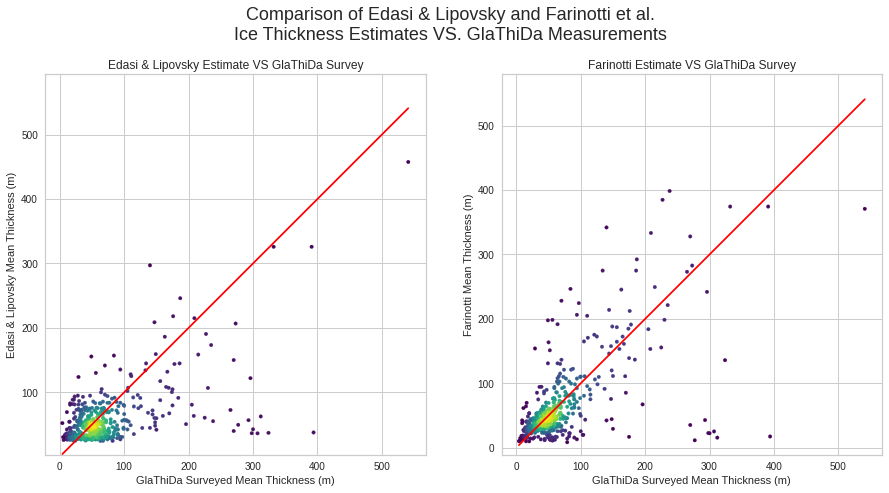

In [151]:
fig = plt.subplots(figsize = (15,8))
plt.subplot(1,2,1)
plt.scatter(
    data_3,
    data_1,
    marker = '.',
    c = (z_1),
    cmap = 'viridis'
)
plt.axis('square')

plt.plot(
    (df['Thickness'].min(), df['Thickness'].max()),
    (df['Thickness'].min(), df['Thickness'].max()),
    color = 'red',
    linestyle = '-'
)
plt.title('Edasi & Lipovsky Estimate VS GlaThiDa Survey')
plt.ylabel('Edasi & Lipovsky Mean Thickness (m)')
plt.xlabel('GlaThiDa Surveyed Mean Thickness (m)')

plt.subplot(1,2,2)
plt.scatter(
    data_3,
    data_2,
    marker = '.',
    c = (z_2),
    cmap = 'viridis'
)
plt.axis('square')
plt.plot(
    (df['Thickness'].min(), df['Thickness'].max()),
    (df['Thickness'].min(), df['Thickness'].max()),
    color = 'red',
    linestyle = '-'
)
plt.title('Farinotti Estimate VS GlaThiDa Survey')
plt.ylabel('Farinotti Mean Thickness (m)')
plt.xlabel('GlaThiDa Surveyed Mean Thickness (m)')
plt.suptitle(
    'Comparison of Edasi & Lipovsky and Farinotti et al.' + 
    '\nIce Thickness Estimates VS. GlaThiDa Measurements', y = .95, fontsize = 18
)

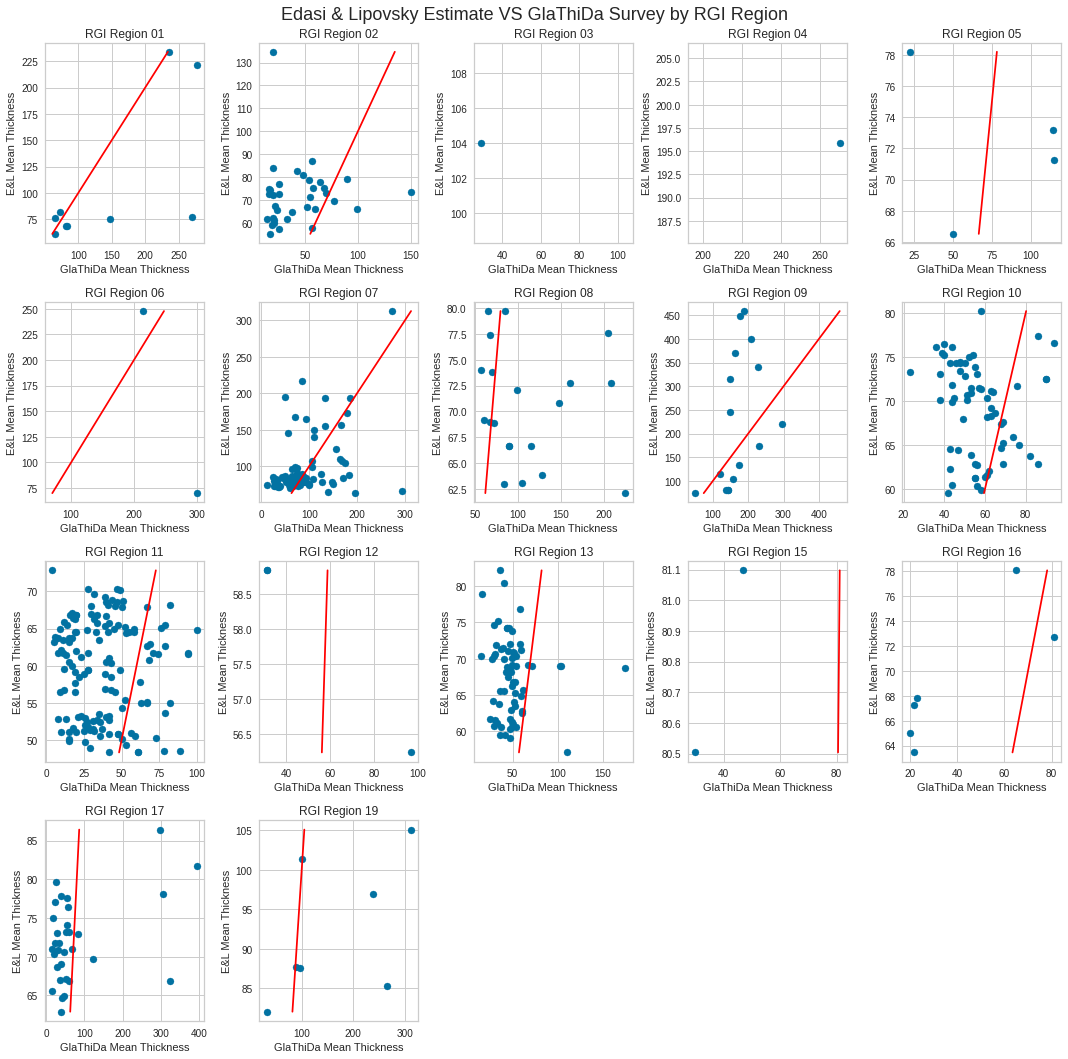

In [144]:
fig,ax=plt.subplots(1,1,figsize=(15,15))
for n, reg in enumerate(df['region'].unique()):
    dft = df[df['region'] == reg]
    data_1 = dft['Edasi Mean Thickness'],
    data_2 = dft['Thickness']
    ax = plt.subplot(4,5,n+1)
    ax.set_xlabel('GlaThiDa Mean Thickness')
    ax.set_ylabel('E&L Mean Thickness')
    ax.set_title('RGI Region ' + reg)
    plt.scatter(
        data_2,
        data_1,
#         marker = '.',
#         c = (z),
#         cmap = 'viridis'
    )
    # plt.axis('square')
    plt.plot(
        (dft['Edasi Mean Thickness'].min(), dft['Edasi Mean Thickness'].max()),
        (dft['Edasi Mean Thickness'].min(), dft['Edasi Mean Thickness'].max()),
        color = 'red',
        linestyle = '-'
    )
plt.suptitle('Edasi & Lipovsky Estimate VS GlaThiDa Survey by RGI Region', fontsize = 18)
plt.tight_layout()

# Do these terrible underestimated glaciers have anything in common?

In [9]:
df['Farinotti Residual'] = abs(df['Farinotti Mean Thickness'] - df['Thickness'])
df = df.sort_values('Farinotti Residual', ascending = False)

In [10]:
feature_list = [
    'Farinotti Mean Thickness', 'Thickness', 'Area', 'Slope', 
    'Lmax', 'Zmed', 'Zmax'
]

In [11]:
def rsf(rank = 'top', stat = 'mean'):
    

    residuals = []
    for feature in feature_list:
        if rank == 'top':
            if stat == 'mean':
                statistic = str(np.round(df[feature].head(111).mean(),2))
            if stat =='median':
                statistic = str(np.round(df[feature].head(111).median(),2))
            if stat == 'std':
                statistic = str(np.round(df[feature].head(111).std(),2))
        if rank == 'bot':
            if stat == 'mean':
                statistic = str(np.round(df[feature].tail(111).mean(),2))
            if stat =='median':
                statistic = str(np.round(df[feature].tail(111).median(),2))
            if stat == 'std':
                statistic = str(np.round(df[feature].tail(111).std(),2))
        residuals.append(statistic)
    return residuals

In [12]:
# feature_list.insert(0, 'Weighted Mean Thickness_x')
residual_stats_f = pd.DataFrame(
{
    'Feature':[
        'Estimated Mean Thickness', 'GlaThiDa Mean Thickness',
        'Area (km^2)', 'Slope(deg)','Maximum Length (m)',
        'Median Elevation (m)', 'Maximum Elevation (m)'
    ],
    '25% highest residuals mean feature value':rsf(rank = 'top', stat = 'mean'),
    '25% lowest residuals mean feature value':rsf(rank = 'bot', stat = 'mean'),
    '25% highest residuals median feature value':rsf(rank = 'top', stat = 'median'),
    '25% lowest residual median feature value':rsf(rank = 'bot', stat = 'median'),
    '25% highest residual std feature value':rsf(rank = 'top', stat = 'std'),
    '25% lowest residual std feature value':rsf(rank = 'bot', stat = 'std'),
}
)
residual_stats_f

,Feature,25% highest residuals mean feature value,25% lowest residuals mean feature value,25% highest residuals median feature value,25% lowest residual median feature value,25% highest residual std feature value,25% lowest residual std feature value
0,Estimated Mean Thickness,115.86,46.9,87.23,39.57,107.21,42.26
1,GlaThiDa Mean Thickness,128.93,46.18,94.0,40.0,99.88,42.0
2,Area (km^2),117.29,17.45,5.31,1.74,387.91,148.02
3,Slope(deg),15.32,18.16,13.6,17.7,8.61,5.75
4,Maximum Length (m),8966.82,3211.56,3745.0,2310.0,13060.36,6000.99
5,Median Elevation (m),1387.33,3099.81,749.0,3103.0,1328.77,1081.53
6,Maximum Elevation (m),1703.81,3427.49,1026.0,3488.0,1250.19,1113.09


In [13]:
df['E&L Residual'] = abs(df['Edasi Mean Thickness'] - df['Thickness'])
df = df.sort_values('E&L Residual', ascending = False)
feature_list.remove('Farinotti Mean Thickness')
feature_list.insert(0, 'Edasi Mean Thickness')

In [14]:
residual_stats_e = pd.DataFrame(
{
    'Feature':[
        'Estimated Mean Thickness', 'GlaThiDa Mean Thickness',
        'Area (km^2)', 'Slope(deg)','Maximum Length (m)',
        'Median Elevation (m)', 'Maximum Elevation (m)'
    ],
    '25% highest residuals mean feature value':rsf(rank = 'top', stat = 'mean'),
    '25% lowest residuals mean feature value':rsf(rank = 'bot', stat = 'mean'),
    '25% highest residuals median feature value':rsf(rank = 'top', stat = 'median'),
    '25% lowest residual median feature value':rsf(rank = 'bot', stat = 'median'),
    '25% highest residual std feature value':rsf(rank = 'top', stat = 'std'),
    '25% lowest residual std feature value':rsf(rank = 'bot', stat = 'std'),
}
)
residual_stats_e

,Feature,25% highest residuals mean feature value,25% lowest residuals mean feature value,25% highest residuals median feature value,25% lowest residual median feature value,25% highest residual std feature value,25% lowest residual std feature value
0,Estimated Mean Thickness,229.22,78.98,84.18,74.53,468.8,30.7
1,GlaThiDa Mean Thickness,115.72,74.73,49.0,68.0,122.78,31.93
2,Area (km^2),142.65,11.19,2.8,3.64,417.53,30.53
3,Slope(deg),16.71,15.93,16.8,15.3,8.96,6.29
4,Maximum Length (m),9675.87,4122.95,2846.0,3499.0,14747.32,3376.69
5,Median Elevation (m),1830.99,2263.88,1858.0,2984.0,1417.02,1433.94
6,Maximum Elevation (m),2187.86,2622.89,2254.0,3278.0,1404.45,1432.11


In [15]:
select = [x for x in residual_stats_f.columns if x != 'Feature']
df_f = residual_stats_f[select]
df_f

select = [x for x in residual_stats_e.columns if x != 'Feature']
df_e = residual_stats_e[select]
df_e

,25% highest residuals mean feature value,25% lowest residuals mean feature value,25% highest residuals median feature value,25% lowest residual median feature value,25% highest residual std feature value,25% lowest residual std feature value
0,229.22,78.98,84.18,74.53,468.8,30.7
1,115.72,74.73,49.0,68.0,122.78,31.93
2,142.65,11.19,2.8,3.64,417.53,30.53
3,16.71,15.93,16.8,15.3,8.96,6.29
4,9675.87,4122.95,2846.0,3499.0,14747.32,3376.69
5,1830.99,2263.88,1858.0,2984.0,1417.02,1433.94
6,2187.86,2622.89,2254.0,3278.0,1404.45,1432.11


In [16]:
df_f

,25% highest residuals mean feature value,25% lowest residuals mean feature value,25% highest residuals median feature value,25% lowest residual median feature value,25% highest residual std feature value,25% lowest residual std feature value
0,115.86,46.9,87.23,39.57,107.21,42.26
1,128.93,46.18,94.0,40.0,99.88,42.0
2,117.29,17.45,5.31,1.74,387.91,148.02
3,15.32,18.16,13.6,17.7,8.61,5.75
4,8966.82,3211.56,3745.0,2310.0,13060.36,6000.99
5,1387.33,3099.81,749.0,3103.0,1328.77,1081.53
6,1703.81,3427.49,1026.0,3488.0,1250.19,1113.09


In [17]:
df_f = df_f.astype(float)
for row in range(0, 7, 1):
#     for col in list(df_f):
#         print(row)
#         print(col)
    y = pd.Series(df_f.loc[row,:].astype(float), name = col
#                   name = 'poop'
                 )

    x = np.linspace(df_f.loc[row,:].min(), df_f.loc[row,:].max(),
             len(df_f) - 1
             )
    z = residual_stats_e['Feature'].iloc[row]

    plt.scatter(
        x,
        y
    )
#         plt.text(x, y, col)
    plt.title(residual_stats_e.loc[row,'Feature'])
    plt.xlabel('Farinotti Residuals')
    plt.ylabel('Edasi & Lipovsky Residuals')
#     plt.xlim = (0, 2000)
#     plt.ylim = (0, 2000)
#     plt.xscale = ('log')
#     plt.yscale = ('log')
    plt.show()
    # plt.axis('square')

NameError: name 'col' is not defined

# Build regional statistics difference table

In [24]:
def find_residual_stat_diff(stat = 'length', region = '01', study = 'edasi'):
    
    dft = df[df['region'] == region]
    
    if stat == 'mean':
        
        mean_e = np.array(dft['Thickness'] - dft['Edasi Mean Thickness']).mean()
        mean_g = np.array(dft['Thickness'] - dft['Thickness']).mean()
        mean_f = np.array(dft['Thickness'] - dft['Farinotti Mean Thickness']).mean()
        statistic_e = mean_e - mean_g
        statistic_f = mean_f - mean_g
    
    if stat == 'median':
        e = np.array(dft['Thickness'] - dft['Edasi Mean Thickness'])
        median_e = np.median(e)
        g = np.array(dft['Thickness'] - dft['Thickness'])
        median_g = np.median(g)
        f = np.array(dft['Thickness'] - dft['Farinotti Mean Thickness'])
        median_f = np.median(f)
        statistic_e = median_e - median_g
        statistic_f = median_f - median_g
    
    if stat == 'std':
        std_e = np.array(dft['Thickness'] - dft['Edasi Mean Thickness']).std()
        std_g = np.array(dft['Thickness'] - dft['Thickness']).std()
        std_f = np.array(dft['Thickness'] - dft['Farinotti Mean Thickness']).std()
        statistic_e = std_e - std_g
        statistic_f = std_f - std_g
    if stat == 'length':
        statistic_e = len(dft)
        statistic_f = len(dft)
#     print(statistic)
#     print(residuals)
    if study == 'edasi':
        residual = statistic_e
    if study == 'farinotti':
        residual = statistic_f
#     print(residuals)
    return residual

In [25]:
region_list = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
        '12', '13', '15', '16', '17', '19']

In [26]:
mean_diff_e = []
for reg in region_list:
    res = find_residual_stat_diff(stat = 'mean', region = reg, study = 'edasi')
    mean_diff_e.append(res)

mean_diff_f = []
for reg in region_list:
    res = find_residual_stat_diff(stat = 'mean', region = reg, study = 'farinotti')
    mean_diff_f.append(res)

median_diff_e = []
for reg in region_list:
    res = find_residual_stat_diff(stat = 'median', region = reg, study = 'edasi')
    median_diff_e.append(res)

median_diff_f = []
for reg in region_list:
    res = find_residual_stat_diff(stat = 'median', region = reg, study = 'farinotti')
    median_diff_f.append(res)

std_diff_e = []
for reg in region_list:
    res = find_residual_stat_diff(stat = 'std', region = reg, study = 'edasi')
    std_diff_e.append(res)

std_diff_f = []
for reg in region_list:
    res = find_residual_stat_diff(stat = 'std', region = reg, study = 'farinotti')
    std_diff_f.append(res)
    
trainable_glaciers = []
for reg in region_list:
    res = find_residual_stat_diff(stat = 'length', region = reg, study = 'farinotti')
    trainable_glaciers.append(res)
print(*trainable_glaciers)

9 35 3 2 4 3 81 20 18 66 141 3 68 2 6 32 7


In [27]:
stats = pd.DataFrame({
    'RGI Region':[
        *region_list
    ],
    'E&L Difference of Mean':[
        *mean_diff_e
    ],
    'Farinotti Difference of Mean':[
        *mean_diff_f
    ],
    'E&L Difference of Median':[
        *median_diff_e
    ],    
    'Farinotti Difference of Median':[
        *median_diff_f
    ],
    'E&L Difference of STD':[
        *std_diff_e
    ],
    'Farinotti Difference of STD':[
        *std_diff_f
    ],
    'Trainable Glaciers':[
        *trainable_glaciers
    ]
})
stats

,RGI Region,E&L Difference of Mean,Farinotti Difference of Mean,E&L Difference of Median,Farinotti Difference of Median,E&L Difference of STD,Farinotti Difference of STD,Trainable Glaciers
0,01,37.392203,77.981038,1.990652,59.614202,82.240215,97.924514,9
1,02,-38.604020,8.326012,-47.071463,0.798704,29.417690,25.048409,35
2,03,-1097.056879,40.043923,-664.809121,75.065980,1037.655256,123.006823,3
3,04,-1441.063733,-98.419435,-1441.063733,-98.419435,1466.302445,40.415865,2
4,05,-2.093385,13.129670,6.520989,10.986469,43.722009,15.270133,4
5,06,-433.157166,79.675773,-107.737859,-4.212620,707.365031,140.525549,3
6,07,-26.316565,-19.137063,-17.486366,-16.584312,93.081701,68.170291,81
7,08,34.889204,11.899313,17.289863,15.459857,53.103235,26.900465,20
8,09,-187.069703,-39.455114,-104.853716,-37.697105,228.302520,58.808158,18
9,10,-20.929388,19.841131,-23.047338,18.040144,16.789800,16.786918,66


In [49]:
stats = stats.sort_values('Trainable Glaciers', ascending = False)
stats

,RGI Region,E&L Difference of Mean,Farinotti Difference of Mean,E&L Difference of Median,Farinotti Difference of Median,E&L Difference of STD,Farinotti Difference of STD,Trainable Glaciers
10,11,-28.203910,-4.490770,-31.214131,-5.107185,24.340921,19.008386,141
6,07,-26.316565,-19.137063,-17.486366,-16.584312,93.081701,68.170291,81
12,13,-25.292035,12.522796,-28.778943,7.615041,24.814856,25.301089,68
9,10,-20.929388,19.841131,-23.047338,18.040144,16.789800,16.786918,66
1,02,-38.604020,8.326012,-47.071463,0.798704,29.417690,25.048409,35
15,17,-0.359636,30.418439,-29.718173,-4.876753,96.907973,99.025596,32
7,08,34.889204,11.899313,17.289863,15.459857,53.103235,26.900465,20
8,09,-187.069703,-39.455114,-104.853716,-37.697105,228.302520,58.808158,18
0,01,37.392203,77.981038,1.990652,59.614202,82.240215,97.924514,9
16,19,65.626661,0.929671,6.999589,-8.121830,94.129008,139.075627,7


In [29]:
from scipy.stats import pearsonr

In [30]:
print(len(stats))

17


In [51]:
x = (stats['Farinotti Difference of Mean'])
y = (stats['Trainable Glaciers'])
pearsonr(x,y)

(-0.10202870540302894, 0.6967939817834635)

Exponential Fit: y = (a*(x**b))
	a = popt[0] = 4.673870089436619
	b = popt[1] = 0.39236842679686057


Text(0.5, 0, 'E&L Difference of Mean')

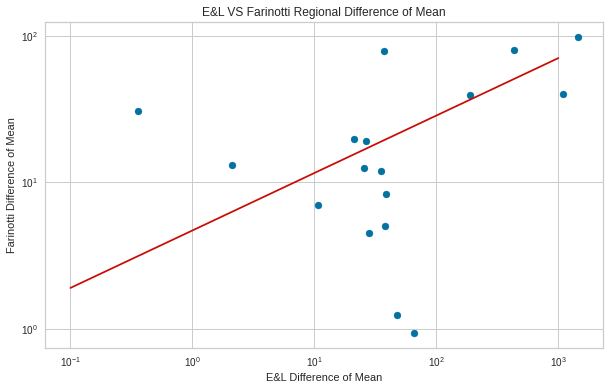

In [32]:
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit
fig = plt.subplots(figsize = (10,6))
# plt.subplot(1,2,1)
x = abs(stats['E&L Difference of Mean'])
y = abs(stats['Farinotti Difference of Mean'])
plt.scatter(
    x,
    y
)
plt.xscale('log')
plt.yscale('log')
def myExpFunc(x, a, b):
    return a * np.power(x, b)

newX = np.logspace(-1, 3, base=10)

popt, pcov = curve_fit(myExpFunc, x, y)
plt.plot(newX, myExpFunc(newX, *popt), 'r-',
#          label="({0:.3f}*x**{1:.3f})".format(*popt)
        )



# r2 = r2_score(x, y)
r2 = x.corr(y)
print("Exponential Fit: y = (a*(x**b))")
print ("\ta = popt[0] = {0}\n\tb = popt[1] = {1}".format(*popt))

plt.title(
    'E&L VS Farinotti Regional Difference of Mean')
# \n$R^2$ = ' + str(r2)

plt.ylabel('Farinotti Difference of Mean')
plt.xlabel('E&L Difference of Mean')

In [33]:
x = abs(stats['E&L Difference of Median'])
y = abs(stats['Farinotti Difference of Median'])
pearsonr(x,y)

(0.8285885983424275, 3.96687427588347e-05)

Exponential Fit: y = (a*(x**b))
	a = popt[0] = 1.3381135804021018
	b = popt[1] = 0.5957593921387919


Text(0.5, 0, 'E&L Difference of Median')

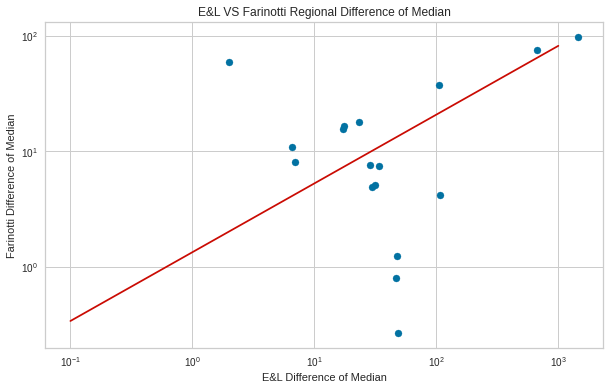

In [34]:
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit
fig = plt.subplots(figsize = (10,6))
# plt.subplot(1,2,1)
x = abs(stats['E&L Difference of Median'])
y = abs(stats['Farinotti Difference of Median'])
plt.scatter(
    x,
    y
)
plt.xscale('log')
plt.yscale('log')

newX = np.logspace(-1, 3, base=10)

popt, pcov = curve_fit(myExpFunc, x, y)
plt.plot(newX, myExpFunc(newX, *popt), 'r-',
#          label="({0:.3f}*x**{1:.3f})".format(*popt)
        )



# r2 = r2_score(x, y)
r2 = x.corr(y)
print("Exponential Fit: y = (a*(x**b))")
print ("\ta = popt[0] = {0}\n\tb = popt[1] = {1}".format(*popt))

plt.title(
    'E&L VS Farinotti Regional Difference of Median')
# \n$R^2$ = ' + str(r2)

plt.ylabel('Farinotti Difference of Median')
plt.xlabel('E&L Difference of Median')

In [35]:
x = abs(stats['E&L Difference of STD'])
y = abs(stats['Farinotti Difference of STD'])
pearsonr(x,y)

(0.3730218675336734, 0.14029235086000366)

Exponential Fit: y = (a*(x**b))
	a = popt[0] = 17.270114134684835
	b = popt[1] = 0.2574310839126221


Text(0.5, 0, 'E&L Difference of STD')

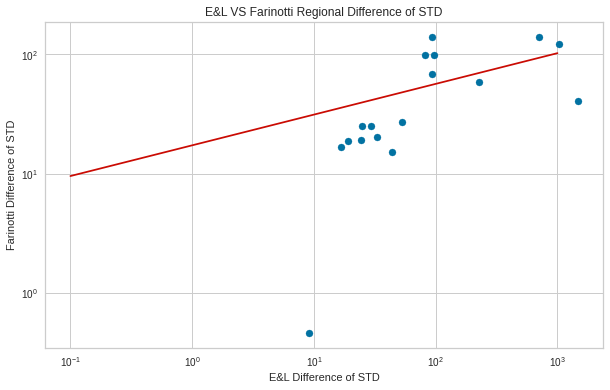

In [36]:
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit
fig = plt.subplots(figsize = (10,6))
# plt.subplot(1,2,1)
x = abs(stats['E&L Difference of STD'])
y = abs(stats['Farinotti Difference of STD'])
plt.scatter(
    x,
    y
)
plt.xscale('log')
plt.yscale('log')

newX = np.logspace(-1, 3, base=10)

popt, pcov = curve_fit(myExpFunc, x, y)
plt.plot(newX, myExpFunc(newX, *popt), 'r-',
#          label="({0:.3f}*x**{1:.3f})".format(*popt)
        )



# r2 = r2_score(x, y)
r2 = x.corr(y)
print("Exponential Fit: y = (a*(x**b))")
print ("\ta = popt[0] = {0}\n\tb = popt[1] = {1}".format(*popt))

plt.title(
    'E&L VS Farinotti Regional Difference of STD')
# \n$R^2$ = ' + str(r2)

plt.ylabel('Farinotti Difference of STD')
plt.xlabel('E&L Difference of STD')

In [37]:
x = abs(stats['E&L Difference of Mean'])
y = abs(stats['Trainable Glaciers'])
pearsonr(x,y)

(-0.31273370355981767, 0.22164489259015527)

In [38]:
x = abs(stats['Farinotti Difference of Mean'])
y = abs(stats['Trainable Glaciers'])
pearsonr(x,y)

(-0.31434765229882283, 0.2191415411442788)

Exponential Fit: y = (a*(x**b))
	a = popt[0] = 40.50034442192421
	b = popt[1] = -0.08783813130971209
Exponential Fit: y = (a*(x**b))
	a = popt[0] = 35.54927669578318
	b = popt[1] = -0.07231460092263402


Text(0.5, 1.05, 'Comparison of Edasi & Lipovsky and Farinotti et al.\nTrainable Glaciers VS Difference of Regional Mean')

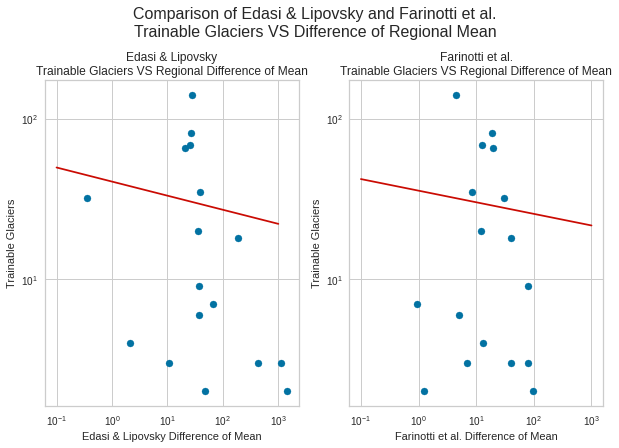

In [39]:
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit
fig = plt.subplots(figsize = (10,6))
plt.subplot(1,2,1)
x = abs(stats['E&L Difference of Mean'])
y = abs(stats['Trainable Glaciers'])
plt.scatter(
    x,
    y
)
plt.xscale('log')
plt.yscale('log')

newX = np.logspace(-1, 3, base=10)

popt, pcov = curve_fit(myExpFunc, x, y)
plt.plot(newX, myExpFunc(newX, *popt), 'r-',
#          label="({0:.3f}*x**{1:.3f})".format(*popt)
        )



# r2 = r2_score(x, y)
r2 = x.corr(y)
print("Exponential Fit: y = (a*(x**b))")
print ("\ta = popt[0] = {0}\n\tb = popt[1] = {1}".format(*popt))

plt.title(
    'Edasi & Lipovsky\nTrainable Glaciers VS Regional Difference of Mean')
# \n$R^2$ = ' + str(r2)

plt.ylabel('Trainable Glaciers')
plt.xlabel('Edasi & Lipovsky Difference of Mean')
x = abs(stats['Farinotti Difference of Mean'])
y = abs(stats['Trainable Glaciers'])
plt.subplot(1,2,2)
plt.scatter(
    x,
    y
)
# r2 = r2_score(x, y)
r2 = x.corr(y)

plt.xscale('log')
plt.yscale('log')
newX = np.logspace(-1, 3, base=10)

popt, pcov = curve_fit(myExpFunc, x, y)
plt.plot(newX, myExpFunc(newX, *popt), 'r-',
#          label="({0:.3f}*x**{1:.3f})".format(*popt)
        )
print("Exponential Fit: y = (a*(x**b))")
print ("\ta = popt[0] = {0}\n\tb = popt[1] = {1}".format(*popt))


plt.title(
    'Farinotti et al.\nTrainable Glaciers VS Regional Difference of Mean')
# \n$R^2$ = ' + str(r2)
plt.ylabel('Trainable Glaciers')
plt.xlabel('Farinotti et al. Difference of Mean')
plt.suptitle(
    'Comparison of Edasi & Lipovsky and Farinotti et al.' + 
    '\nTrainable Glaciers VS Difference of Regional Mean', y = 1.05, fontsize = 16
)
# plt.tight_layout()

In [40]:
x = abs(stats['E&L Difference of Median'])
y = abs(stats['Trainable Glaciers'])
pearsonr(x,y)

(-0.25775981360975597, 0.31787614534141523)

In [41]:
x = abs(stats['Farinotti Difference of Median'])
y = abs(stats['Trainable Glaciers'])
pearsonr(x,y)

(-0.27307922863871836, 0.28891834846781933)

Exponential Fit: y = (a*(x**b))
	a = popt[0] = 39.6300127052358
	b = popt[1] = -0.08268213133544276
Exponential Fit: y = (a*(x**b))
	a = popt[0] = 31.112049978243398
	b = popt[1] = -0.026037623539937296


Text(0.5, 1.05, 'Comparison of Edasi & Lipovsky and Farinotti et al.\nTrainable Glaciers VS Difference of Regional Median')

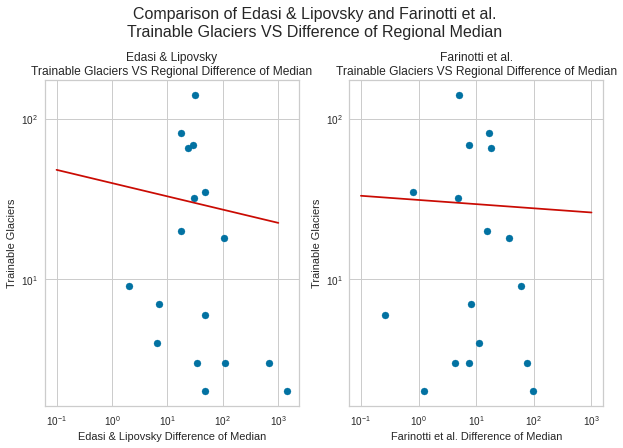

In [42]:
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit
fig = plt.subplots(figsize = (10,6))
plt.subplot(1,2,1)
x = abs(stats['E&L Difference of Median'])
y = abs(stats['Trainable Glaciers'])
plt.scatter(
    x,
    y
)
plt.xscale('log')
plt.yscale('log')

newX = np.logspace(-1, 3, base=10)

popt, pcov = curve_fit(myExpFunc, x, y)
plt.plot(newX, myExpFunc(newX, *popt), 'r-',
#          label="({0:.3f}*x**{1:.3f})".format(*popt)
        )



# r2 = r2_score(x, y)
r2 = x.corr(y)
print("Exponential Fit: y = (a*(x**b))")
print ("\ta = popt[0] = {0}\n\tb = popt[1] = {1}".format(*popt))

plt.title(
    'Edasi & Lipovsky\nTrainable Glaciers VS Regional Difference of Median')
# \n$R^2$ = ' + str(r2)

plt.ylabel('Trainable Glaciers')
plt.xlabel('Edasi & Lipovsky Difference of Median')
x = abs(stats['Farinotti Difference of Median'])
y = abs(stats['Trainable Glaciers'])
plt.subplot(1,2,2)
plt.scatter(
    x,
    y
)
# r2 = r2_score(x, y)
r2 = x.corr(y)

plt.xscale('log')
plt.yscale('log')
newX = np.logspace(-1, 3, base=10)

popt, pcov = curve_fit(myExpFunc, x, y)
plt.plot(newX, myExpFunc(newX, *popt), 'r-',
#          label="({0:.3f}*x**{1:.3f})".format(*popt)
        )
print("Exponential Fit: y = (a*(x**b))")
print ("\ta = popt[0] = {0}\n\tb = popt[1] = {1}".format(*popt))


plt.title(
    'Farinotti et al.\nTrainable Glaciers VS Regional Difference of Median')
# \n$R^2$ = ' + str(r2)
plt.ylabel('Trainable Glaciers')
plt.xlabel('Farinotti et al. Difference of Median')
plt.suptitle(
    'Comparison of Edasi & Lipovsky and Farinotti et al.' + 
    '\nTrainable Glaciers VS Difference of Regional Median', y = 1.05, fontsize = 16
)
# plt.tight_layout()

In [43]:
x = abs(stats['E&L Difference of STD'])
y = abs(stats['Trainable Glaciers'])
pearsonr(x,y)


(-0.3306760058108814, 0.19483781340622644)

In [44]:
x = abs(stats['Farinotti Difference of STD'])
y = abs(stats['Trainable Glaciers'])
pearsonr(x,y)

(-0.26949981567388454, 0.29553686732771456)

Exponential Fit: y = (a*(x**b))
	a = popt[0] = 87.61799940501467
	b = popt[1] = -0.2634630227238516
Exponential Fit: y = (a*(x**b))
	a = popt[0] = 31.622915240624064
	b = popt[1] = -0.020814511789599508


Text(0.5, 1.05, 'Comparison of Edasi & Lipovsky and Farinotti et al.\nTrainable Glaciers VS Difference of Regional STD')

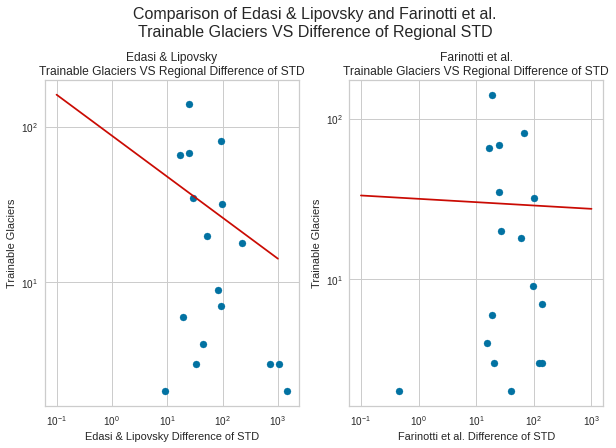

In [45]:
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit
fig = plt.subplots(figsize = (10,6))
plt.subplot(1,2,1)
x = abs(stats['E&L Difference of STD'])
y = abs(stats['Trainable Glaciers'])
plt.scatter(
    x,
    y
)
plt.xscale('log')
plt.yscale('log')

newX = np.logspace(-1, 3, base=10)

popt, pcov = curve_fit(myExpFunc, x, y)
plt.plot(newX, myExpFunc(newX, *popt), 'r-',
#          label="({0:.3f}*x**{1:.3f})".format(*popt)
        )



# r2 = r2_score(x, y)
r2 = x.corr(y)
print("Exponential Fit: y = (a*(x**b))")
print ("\ta = popt[0] = {0}\n\tb = popt[1] = {1}".format(*popt))

plt.title(
    'Edasi & Lipovsky\nTrainable Glaciers VS Regional Difference of STD')
# \n$R^2$ = ' + str(r2)

plt.ylabel('Trainable Glaciers')
plt.xlabel('Edasi & Lipovsky Difference of STD')
x = abs(stats['Farinotti Difference of STD'])
y = abs(stats['Trainable Glaciers'])
plt.subplot(1,2,2)
plt.scatter(
    x,
    y
)
# r2 = r2_score(x, y)
r2 = x.corr(y)

plt.xscale('log')
plt.yscale('log')
newX = np.logspace(-1, 3, base=10)

popt, pcov = curve_fit(myExpFunc, x, y)
plt.plot(newX, myExpFunc(newX, *popt), 'r-',
#          label="({0:.3f}*x**{1:.3f})".format(*popt)
        )
print("Exponential Fit: y = (a*(x**b))")
print ("\ta = popt[0] = {0}\n\tb = popt[1] = {1}".format(*popt))


plt.title(
    'Farinotti et al.\nTrainable Glaciers VS Regional Difference of STD')
# \n$R^2$ = ' + str(r2)
plt.ylabel('Trainable Glaciers')
plt.xlabel('Farinotti et al. Difference of STD')
plt.suptitle(
    'Comparison of Edasi & Lipovsky and Farinotti et al.' + 
    '\nTrainable Glaciers VS Difference of Regional STD', y = 1.05, fontsize = 16
)
# plt.tight_layout()